# Examen 2do Parcial (Aprendizaje no supervisado) 
# Examen de Laboratorio Grupo 1

- Nombre: Dimar Gabriel Lopez Chiri

| ID | Nombre | Enlace | Descripción |
|----|--------|--------|-------------|
| 83 | Elevator Predictive Maintenance Dataset | [Link](https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset) | predecir el valor absoluto de la vibración |
|158 | Point Cloud Mnist 2D	| [Link](https://www.kaggle.com/datasets/cristiangarcia/pointcloudmnist2d?select=test.csv) | Consiste en convertir cada uno de los píxeles distintos de cero en puntos en un espacio 2D clasificando cada colección de puntos en lugar de imágenes que son números  de 0 a 9 |


In [1]:
import numpy as np #para el manejo de matrices y vectores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression

# used for manipulating directory paths
import os
# Scientific and vector computation for python
import numpy as np
# Plotting library
from matplotlib import pyplot
# Optimization module in scipy
from scipy import optimize
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
%matplotlib inline

### Carga del dataset

In [2]:

dataset = pd.read_csv('/home/dilpz/Documentos/SIS420-2024/datasets/predictive-maintenance-dataset.csv', delimiter=',')
dataset = dataset.drop(dataset.columns[0], axis=1)

dataset

,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,93.744,73.999,18.00,167.743,19.745,1.266828,8787.937536,5475.852001
1,93.740,73.999,18.00,167.739,19.741,1.266774,8787.187600,5475.852001
2,93.736,73.998,18.00,167.734,19.738,1.266737,8786.437696,5475.704004
3,93.732,73.998,18.00,167.730,19.734,1.266683,8785.687824,5475.704004
4,93.729,73.998,18.00,167.727,19.731,1.266642,8785.125441,5475.704004
...,...,...,...,...,...,...,...,...
111996,20.186,73.992,2.00,94.178,-53.806,0.272813,407.474596,5474.816064
111997,20.186,73.992,20.01,94.178,-53.806,0.272813,407.474596,5474.816064
111998,20.185,73.992,20.01,94.177,-53.807,0.272800,407.434225,5474.816064
111999,20.185,73.992,20.00,94.177,-53.807,0.272800,407.434225,5474.816064


#### Separamos 80% para entrenamiento y 20% para pruebas

In [3]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_dataset.drop(['vibration'], axis=1).values
#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_dataset['vibration'].values
m_test = len(y_test)

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_dataset.drop(['vibration'], axis=1).values
y_train = train_dataset['vibration'].values
m_train = len(y_train)

#para la aplicacion de la silueta
X_train_subset = X_train[:2000]


Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas imágenes más representativas de cada grupo.

en ``kmeans.fit_transform(X_train)`` transformamos X_train en una matriz de distancias a los centroides de los clústeres. X_digits_dist contendrá una matriz donde cada fila representará una instancia de X_train y cada columna representará la distancia de esa instancia a cada uno de los 50 centroides de los clústeres.

* la fila es la instancia de X_train.
* la columna es la distancia de esa instancia a cada centroide de los 50 clusteres.

#### Aplicacion de la silueta:

In [4]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset)
                for k in range(1, 20)]

silhouette_scores = [silhouette_score(X_train_subset, model.labels_)
                     for model in kmeans_per_k[1:]]

# The best value is 1 and the worst value is -1.
# Values near 0 indicate overlapping clusters. 
# Negative values generally indicate that a sample has been assigned to the wrong cluster

plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 20.5, 0, 1.1])
plt.show()

K=1: WCSS=315642472500.20337
K=2: WCSS=65789212936.477806
K=3: WCSS=33989029970.206882
K=4: WCSS=15379720394.920034
K=5: WCSS=9684650966.3782
K=6: WCSS=7069840101.642891
K=7: WCSS=5132191911.693962
K=8: WCSS=4139456112.88551
K=9: WCSS=3436339632.13306
K=10: WCSS=2803864289.020535


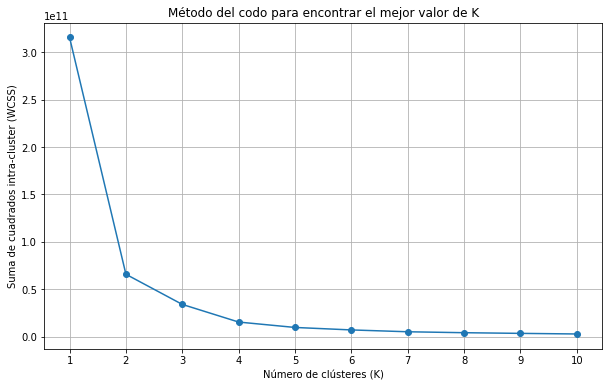

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []   

valores_k = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

    kmeans.fit(X_train)
    # Calculamos la suma de cuadrados intra-cluster (WCSS)
    wcss.append(kmeans.inertia_)
    valores_k.append(k)  # Guarda el valor de K en esta iteración

    # Imprime el valor de K y su correspondiente WCSS
    print(f"K={k}: WCSS={kmeans.inertia_}")

plt.figure(figsize=(10, 6))
plt.plot(valores_k, wcss, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Suma de cuadrados intra-cluster (WCSS)')
plt.title('Método del codo para encontrar el mejor valor de K')
plt.xticks(valores_k)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

print(X_digits_dist.shape)

(89600, 3)


In [ ]:
print(y_train[:10])

[ 3.61  3.24 38.47  4.07 99.86 21.12  8.   66.54 30.4   7.41]


In [ ]:
y_pred = kmeans.predict(X_test)
print(y_pred[:10])

[1 2 1 0 0 1 0 0 0 1]


In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50000, random_state=42)
%time log_reg.fit(X_train[:50], y_pred[:50])
log_reg.score(X_test, y_pred)

CPU times: user 18.1 ms, sys: 716 µs, total: 18.8 ms
Wall time: 17.3 ms


0.7139413419043793

### Segundo dataset

In [ ]:
# Importamos el dataset
train_dataset = pd.read_csv('/home/dilpz/Documentos/SIS420-2024/datasets/numeros POINT cloud MNIST/train.csv', delimiter=',')
test_dataset = pd.read_csv('/home/dilpz/Documentos/SIS420-2024/datasets/numeros POINT cloud MNIST/test.csv', delimiter=',')


#Separamos en X_test los datos
X_test = test_dataset.drop(['label'], axis=1).values
#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_dataset['label'].values
m_test = len(y_test)

# tomamos train_dataset
X_train = train_dataset.drop(['label'], axis=1).values
y_train = train_dataset['label'].values
m_train = len(y_train)

#para la aplicacion de la silueta
X_train_subset = X_train[:10000]


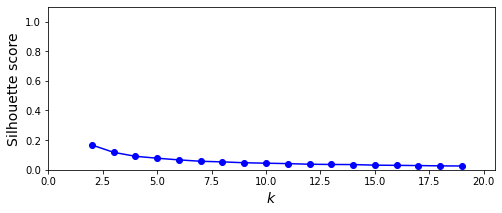

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset)
                for k in range(1, 20)]

silhouette_scores = [silhouette_score(X_train_subset, model.labels_)
                     for model in kmeans_per_k[1:]]

# The best value is 1 and the worst value is -1.
# Values near 0 indicate overlapping clusters. 
# Negative values generally indicate that a sample has been assigned to the wrong cluster

plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 20.5, 0, 1.1])
plt.show()

K=1: WCSS=116254511892.89008
K=2: WCSS=95661118724.8894
K=3: WCSS=87566999941.0177
K=4: WCSS=83292790417.09293
K=5: WCSS=80608843799.6057
K=6: WCSS=78787703757.75461
K=7: WCSS=77464060340.22978
K=8: WCSS=76430405266.93298
K=9: WCSS=75660203210.52554
K=10: WCSS=75031371425.2793


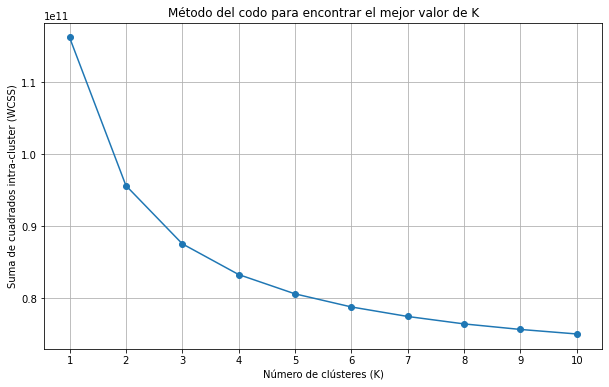

In [ ]:
wcss = []   

valores_k = []

for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, n_init=6, random_state=42)

    kmeans.fit(X_train)
    # Calculamos la suma de cuadrados intra-cluster (WCSS)
    wcss.append(kmeans.inertia_)
    valores_k.append(k)  # Guarda el valor de K en esta iteración

    # Imprime el valor de K y su correspondiente WCSS
    print(f"K={k}: WCSS={kmeans.inertia_}")

plt.figure(figsize=(10, 6))
plt.plot(valores_k, wcss, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Suma de cuadrados intra-cluster (WCSS)')
plt.title('Método del codo para encontrar el mejor valor de K')
plt.xticks(valores_k)
plt.grid(True)
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

print(X_digits_dist.shape)

(89600, 3)


In [ ]:
y_pred = kmeans.predict(X_test)
print(y_pred[:10])

[1 2 1 0 0 1 0 0 0 1]


In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:200], y_pred[:200])
log_reg.score(X_test, y_pred)

CPU times: user 252 ms, sys: 735 ms, total: 987 ms
Wall time: 77.5 ms


0.6090353109236195